<a href="https://colab.research.google.com/github/hilmialfar/Ruangguru-Project/blob/main/Final_Project_Ruangguru_Hilmi_Alfa_Ryan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1 align=center>Product Department

# <h1 align=center>**HILMI ALFA RYAN**

# <h1 align=center>**KELOMPOK 153 DBA-AD**

# **Checkpoint 2**

> **Relational Database SQL**

**Datasets `inventory_items`**
- Primary Key: `id`
- Foreign Key: `product_distribution_center_id` reference on distribution_centers_fk

**Datasets `distribution_centers`**
- Primary Key: `id`

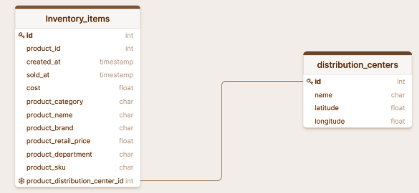

> Hasil ***Left Join*** SQL

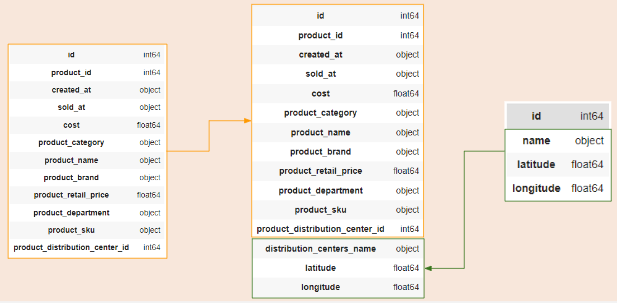

## **Libraries**

In [ ]:
#import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pprint import pprint

from scipy import stats
from time import time
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

## **Data Understanding**

> Dataset ini merupakan data inventory dari E-Commerce (fiktif) The Look pada tahun 2018 hingga 2022 yang berisi informasi tentang produk fashion di The Look berupa tanggal pembuatan produk, tanggal terjualnya produk, harga produksi produk, harga retail produk, nama produk, kategori produk, brand produk, SKU produk, nama distribution centers produk beserta koordinatnya (geolocation). 
Dataset ini diperoleh dengan melakukan left join antara dataset inventory_items dengan dataset distribution_centers yang akan digunakan untuk analisis produk yang laku dan tidak laku terjual serta karakteristiknya. 

> Dataset bersumber dari tim Ruangguru ([Google Big Query: The Look Ecommerce](https://github.com/GoogleCloudPlatform/public-datasets-pipelines/blob/main/datasets/thelook_ecommerce/pipelines/_images/run_thelook_kub/fake.py) &
[Kaggle: Absenteeism Dataset](https://www.kaggle.com/datasets/HRAnalyticRepository/absenteeism-dataset))

In [ ]:
# akses data ke jupyter/google colab
from google.colab import drive 
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
#import dataset
inven_dist = pd.read_csv("/content/drive/MyDrive/module_&_data/finalproject/inventory_distribution.csv", encoding='unicode_escape')
inven_dist.head(5) #menampilkan dataset dengan baris 5 teratas

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id,distribution_centers_name,latitude,longitude
0,140386,17357,2018-11-11,2019-01-05,44.771998,Fashion Hoodies & Sweatshirts,Diamond Supply - Mens Supply Co. Hoodie in Black,Diamond Chain,79.949997,Men,6063DF220A35953787E65276DFA65404,10,Savannah GA,32.0167,-81.1167
1,465835,18164,2018-11-16,2019-01-10,17.762220,Active,Duofold Men's Mid Weight Single-Layer Thermal ...,Duofold,46.619999,Men,EADD2C9C45EC261D4AE66276556FBD55,10,Savannah GA,32.0167,-81.1167
2,1260,15225,2018-11-28,2019-01-20,10.260000,Maternity,A Pea in the Pod: Maternity Tank With Shelf Bra,A Pea in the Pod,22.500000,Women,7C72900E0B6E4108FDF991B696776F6C,7,Philadelphia PA,39.9500,-75.1667
3,160530,19579,2018-12-01,2019-01-13,36.207000,Sweaters,Paul Fredrick 100% Cotton Solid Cardgian Sweat...,Paul Fredrick,74.500000,Men,E8257CAE02495B31C4E89A4AE812499C,5,New Orleans LA,29.9500,-90.0667
4,275173,25062,2018-12-04,2019-01-13,4.530330,Socks,Dickies Men's Work Socks - Various Colors (3 p...,Dickies,7.990000,Men,6005FEAA8FB673D592B2F7A072385048,1,Memphis TN,35.1174,-89.9711


> **Data Dictionary**:

| column | description |
| ------ | ----------- |
| `id` | ID Inventory Items |
| `product_id` | ID product |
| `created_at` | Waktu produk dibuat |
| `sold_at` | Waktu produk terjual |
| `cost` | Harga asli produk |
| `product_category` | Kategori produk |
| `product_name` | Nama produk |
| `product_brand` | Merek produk |
| `product_retail_price` | Harga retail produk |
| `product_department` | Departemen produk (untuk laki-laki/perempuan) |
| `product_sku` | SKU Produk |
| `product_distribution_center_id` | ID Distribution Center produk |
| `distribution_centers_name` | Nama Distribution Centers |
| `latitude` | Titik koordinat latitude Distribution Centers |
| `longitude` | Titik koordinat longitude Distribution Centers |

In [ ]:
inven_dist.shape #ukuran dataset

(487394, 15)

> Dataset ini memiliki jumlah baris sebanyak 487394 dan jumlah kolomnya sebanyak 15.

In [ ]:
inven_dist.info() #mendapatkan informasi datasets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487394 entries, 0 to 487393
Data columns (total 15 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              487394 non-null  int64  
 1   product_id                      487394 non-null  int64  
 2   created_at                      487394 non-null  object 
 3   sold_at                         180508 non-null  object 
 4   cost                            487394 non-null  float64
 5   product_category                487394 non-null  object 
 6   product_name                    487359 non-null  object 
 7   product_brand                   487020 non-null  object 
 8   product_retail_price            487394 non-null  float64
 9   product_department              487394 non-null  object 
 10  product_sku                     487394 non-null  object 
 11  product_distribution_center_id  487394 non-null  int64  
 12  distribution_cen

> - Tipe data `created_at` dan `sold_at` masih berupa `object`, sehingga perlu diubah menjadi tipe data `datetime` karena mengandung waktu. 
- Dari informasi di atas, terlihat bahwa fitur `sold_at`, `product_brand`, dan `product_name` memiliki _missing values_ namun perlu di check lagi nantinya.

# **Checkpoint 3**

## **Exploratory Data Analysis**

In [ ]:
#konversi tipe data dari object ke datetime pada kolom created_at dan sold_at
inven_dist['created_at']=pd.to_datetime(inven_dist.created_at)
inven_dist['sold_at']=pd.to_datetime(inven_dist.sold_at)
inven_dist[['created_at','sold_at']].dtypes

created_at    datetime64[ns]
sold_at       datetime64[ns]
dtype: object

> Tipe data `created_at` dan `sold_at` berhasil dirubah menjadi tipe data `datetime`

In [ ]:
inven_dist.isnull().sum() #melihat jumlah missing value setiap kolom

id                                     0
product_id                             0
created_at                             0
sold_at                           306886
cost                                   0
product_category                       0
product_name                          35
product_brand                        374
product_retail_price                   0
product_department                     0
product_sku                            0
product_distribution_center_id         0
distribution_centers_name              0
latitude                               0
longitude                              0
dtype: int64

> Terdapat ***missing value*** pada `sold_at` sebanyak 306886, `product_name` sebanyak 35, dan `product_brand` sebanyak 374. ***Missing value*** pada `product_name` dan `product_brand` akan dihapus.

In [ ]:
#menghapus missing value pada kolom product_name dan product_brand
inven_dist.dropna(subset=["product_name","product_brand"], inplace=True)

> - ***Missing value*** pada `product_name` dan `product_brand` sudah dihapus.
- Sedangkan ***Missing value*** pada `sold_at` tidak ditangani karena menunjukkan produk masih belum terjual.

In [ ]:
print("Data Duplicated")
inven_dist.duplicated().sum() #check jumlah data yang duplikat

Data Duplicated


0

> - Tidak ditemukan data duplikat pada dataset ini.
> - Untuk memudahkan analisis kedepannya dibuat pembagian fitur numerik dan kategorikal

In [ ]:
#memisahkan serta mengelompokkan data kategorikal dan data numerical
continuous_features = inven_dist[['cost','product_retail_price']].columns.tolist()
categorical_features = inven_dist.select_dtypes(include="object").columns.tolist()

print("Continuous_features:")
pprint(continuous_features)
print('---------------------------------------------------------')
print("Categorical features:")
pprint(categorical_features, compact=True)

Continuous_features:
['cost', 'product_retail_price']
---------------------------------------------------------
Categorical features:
['product_category', 'product_name', 'product_brand', 'product_department',
 'product_sku', 'distribution_centers_name']


> Selanjutnya akan dilihat kondisi data fitur kontinu dengan *summary statistics*

In [ ]:
inven_dist[continuous_features].describe().T.style.background_gradient(cmap="YlOrBr_r") #summary statistics data continuous

,count,mean,std,min,25%,50%,75%,max
cost,486985.000000,28.755192,30.638189,0.008300,11.394300,19.955011,34.707000,557.151002
product_retail_price,486985.000000,59.792537,65.890471,0.020000,24.870001,39.990002,69.959999,999.000000


> - Nilai `cost` dan `product_retail_price` tidak terdapat di bawah 0.  
- Nilai median (50%) pada `cost` dan `product_retail_price` lebih kecil dari nilai rata-ratanya (*mean*) yang mengindikasikan pola distribusi datanya adalah *right-skewed*

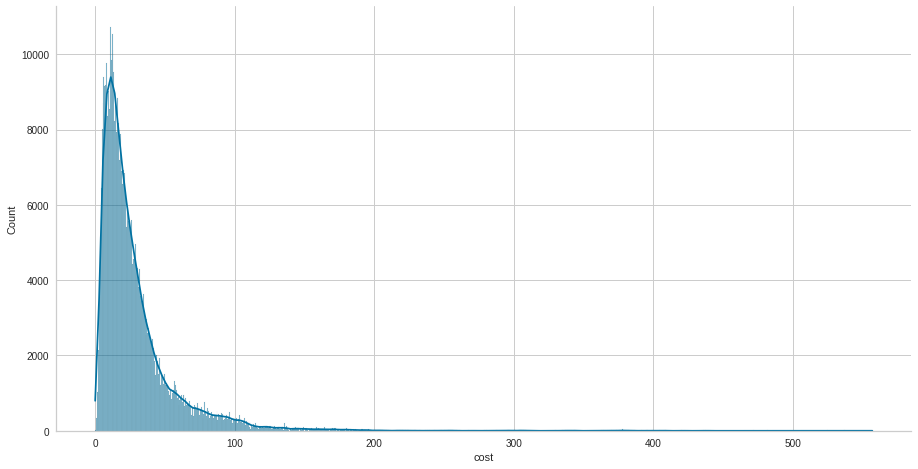

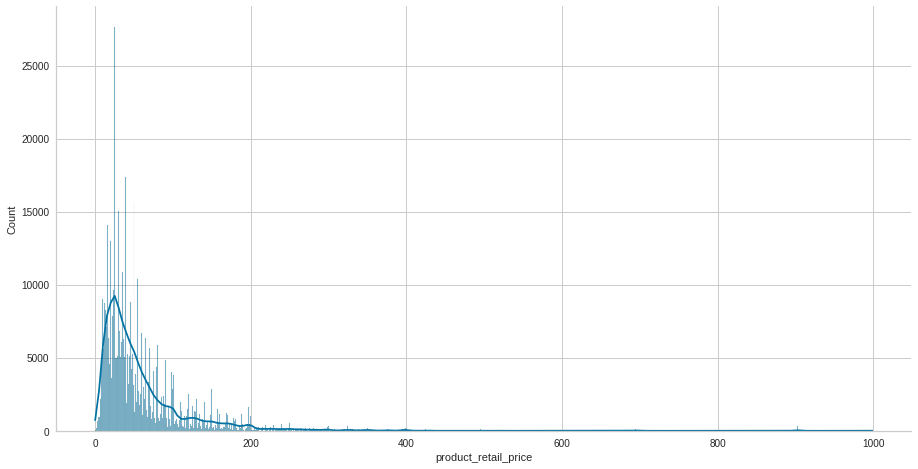

In [ ]:
#Membuat looping for untuk menampilkan histogram plot dari kedua fitur kontinyu
inven_dist_num=inven_dist[continuous_features]
for i in inven_dist_num:
    sns.displot(inven_dist[i], kde=True)
    plt.gcf().set_size_inches(15, 7)
    plt.show()

> - Berdasarkan histogram menunjukkan bahwa distribusi data `cost` dan `product_retail_price` adalah *Right-Skewed*.

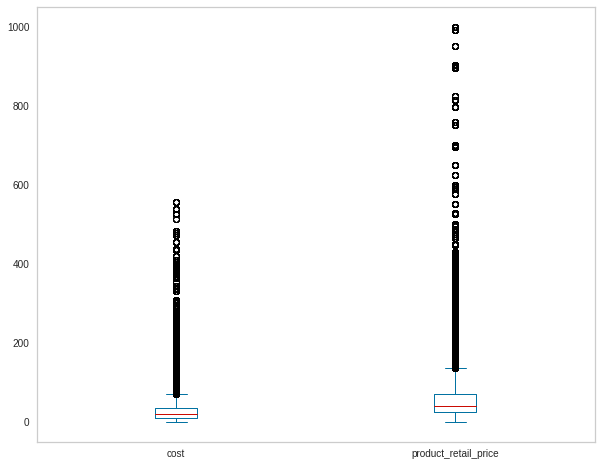

In [ ]:
inven_dist[continuous_features].plot(kind="box", figsize=(10, 8)) #menampilkan box plot untuk kolom cost dan product_retail_price
plt.grid(False) #tidak menampilkan grid
plt.show()

> - Berdasarkan box plot terlihat cukup banyak outlier pada `cost` dan `product_retail_price`

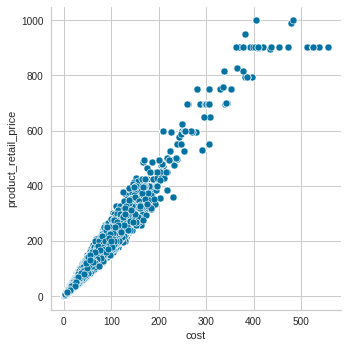

In [ ]:
#Visualisasi scatter plot untuk melihat hubungan antara dua variabel
sns.relplot(x='cost', y='product_retail_price', data=inven_dist)
plt.show()

> - Berdasarkan scatter plot, korelasi antara `cost` dan `product_retail_price` adalah korelasi positif sehingga value `product_retail_price` akan semakin besar seiring bertambahnya value `cost`nya.

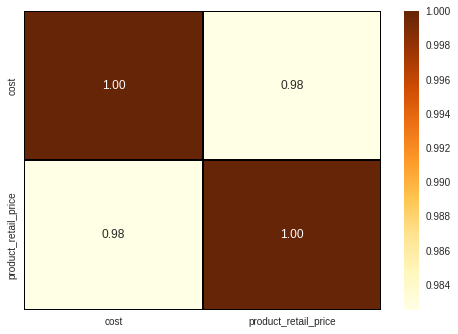

In [ ]:
#Visualisasi heatmap untuk melihat korelasi variabel kontinyu
sns.heatmap(inven_dist[continuous_features].corr(), 
            annot=True, cmap='YlOrBr', linewidth=1, 
            linecolor='black', fmt='.2f')
plt.show()

> - Korelasi antara `cost` dan `product_retail_price` bernilai 0,98 maka korelasinya kuat sehingga memperkuat interpretasi sebelumnya, yaitu value `product_retail_price` akan semakin besar seiring bertambahnya value `cost`.

In [ ]:
inven_dist[categorical_features].describe().T #summary statistics dari data kategorikal

,count,unique,top,freq
product_category,486985,26,Intimates,36244
product_name,486985,27227,Wrangler Men's Premium Performance Cowboy Cut ...,147
product_brand,486985,2754,Allegra K,16392
product_department,486985,2,Men,244203
product_sku,486985,29025,CD79499E36195AC3C3296EB666F9D39E,55
distribution_centers_name,486985,10,Memphis TN,65086


> - `product_department` memiliki jumlah unik yang paling sedikit, yang berarti terdapat 2 grup besar yang membagi produk retail
- Perusahaan retail ini menjual produk dengan 26 kategori produk dan terdapat 2754 brand di dalamnya.
- Jumlah stok produk yang dijual sebanyak 486985
- Selanjutnya akan dicoba memvisualisasikan `product_department`

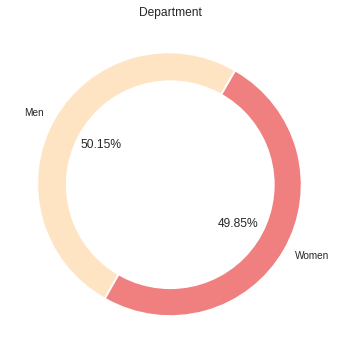

In [ ]:
#membuat dataframe untuk jumlah produk tiap department
dep_count = inven_dist['product_department'].value_counts().to_frame(name="product_quantity").reset_index()
dep_count.rename(columns = {'index':'department'}, inplace=True)

#visualisasi departemen produk
plt.figure(figsize=(8,6))
plt.pie(dep_count['product_quantity'], explode=(0.015,0),
        labels=dep_count['department'],
        colors=['bisque','lightcoral'], autopct='%1.2f%%', 
        startangle=60)

centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Department")
plt.show()

> - Jumlah stok produk yang dijual untuk departemen laki-laki dan perempuan hampir seimbang. Jadi dapat dikatakan perusahaan tidak hanya terfokus pada satu gender.

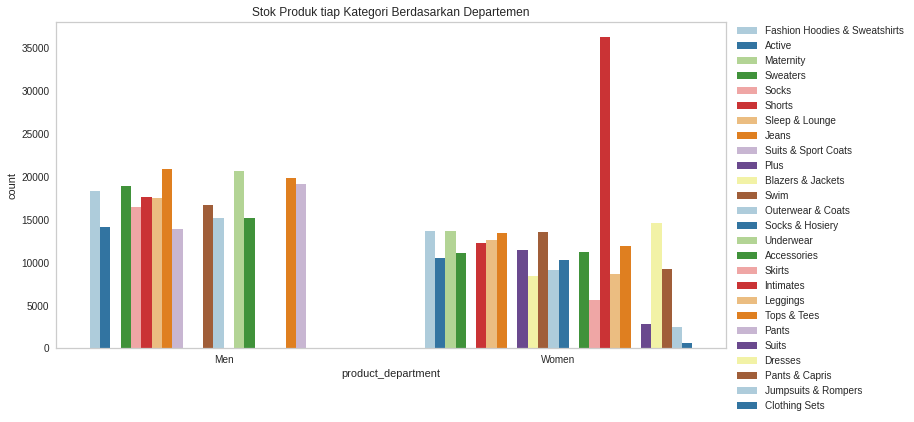

In [ ]:
#Visualisasi stok produk tiap kategori berdasarkan departemen
plt.figure(figsize=(12, 6))
sns.countplot(data=inven_dist, x="product_department", hue="product_category", palette="Paired")
plt.grid(False)
plt.title('Stok Produk tiap Kategori Berdasarkan Departemen')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0) #mengatur letak legend berada di sebelah grafik
plt.show()

> - Pada departemen laki-laki tidak terdapat kategori **Maternity, Plus, Blazers & Jackets, Socks & Hosiery, Skirts, Intimates, Leggings, Suits, Dresses, Pants & Capris, Jumpsuits & Rompers, Clothing Sets**. Hal itu sudah sesuai mengingat beberapa kategori memang hanya untuk perempuan kecuali kategori **Blazers & Jackets, Suits serta Jumpsuits & Rompers** yang terdapat produk untuk laki-laki.
> - Pada departemen perempuan tidak terdapat kategori **Socks, Suits & Sport Coats, Underwear, Pants**. Mungkin dapat ditambahkan produk untuk kategori tersebut dengan menarik beberapa brand yang menjual produk-produk di kategori tersebut.

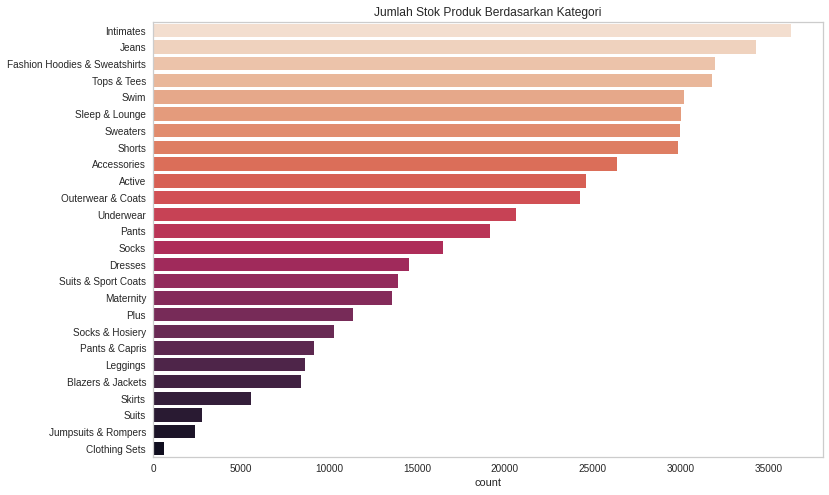

In [ ]:
#Visualisasi jumlah produk berdasarkan kategori
plt.figure(figsize=(12, 8))
sns.countplot(
    y="product_category",
    data=inven_dist,
    order=inven_dist.product_category.value_counts().index,
    palette="rocket_r",
)
plt.grid(False)
plt.ylabel(None)
plt.title('Jumlah Stok Produk Berdasarkan Kategori')
plt.show()

> - Kategori **Intimates** memiliki jumlah stok produk paling banyak
> - Kategori dengan jumlah stok produk paling sedikit adalah **Clothing Sets**

In [ ]:
#membuat fungsi untuk menambah kolom baru
def sold(weight):
  if weight is pd.NaT:
    output = 0
  else:
    output = 1
  return output

In [ ]:
#menambah kolom baru berupa sold yang menunjukkan jumlah produk yang terjual
sold_loc = inven_dist.columns.get_loc(key="sold_at")
inven_dist.insert(sold_loc+1, "sold",
                  inven_dist["sold_at"].apply(sold))

In [ ]:
#menambah kolom quantity yang menunjukkan jumlah stok produk belum terjual atau sisa
inven_dist.insert(5, column="quantity", value=1-inven_dist['sold'])
inven_dist.tail(1)

,id,product_id,created_at,sold_at,sold,quantity,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id,distribution_centers_name,latitude,longitude
487393,362853,11369,2022-06-06,2022-06-06,1,0,7.00161,Intimates,Bust-to-Knee Bodyshaping Underpants,Slim N Lift,12.99,Women,A6A38989DC7E433F1F42388E7AFCA318,1,Memphis TN,35.1174,-89.9711


> Ditambahkan kolom baru berupa `sold` untuk melihat jumlah stok produk yang terjual dan `quantity` untuk melihat jumlah stok produk yang belum terjual.

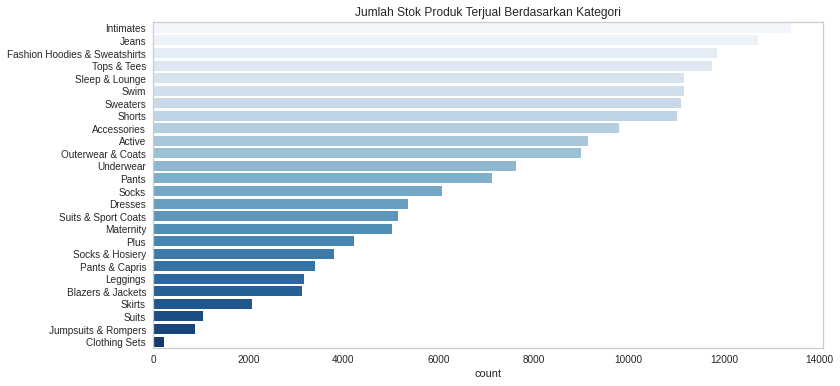

In [ ]:
#Memfilter dataset untuk produk yang sudah terjual
sold = inven_dist[inven_dist['sold'] == 1]
#Visualisasi jumlah produk belum terjual berdasarkan kategori produk
plt.figure(figsize=(12, 6))
sns.countplot(
    y="product_category",
    data=sold,
    order=sold.product_category.value_counts().index,
    palette='Blues'
)
plt.grid(False)
plt.ylabel(None)
plt.title('Jumlah Stok Produk Terjual Berdasarkan Kategori')
plt.show()

> - Kategori **Intimates** juga menjadi kategori dengan jumlah stok produk terjual paling banyak dan kategori **Clothing Sets** memiliki jumlah stok produk terjual paling sedikit.
> - Hal tersebut menunjukkan selaras dengan jumlah produk yang mereka miliki. Maka perlu diketahui bahwa apakah jumlah stok produk semakin banyak maka stok produk yang terjual juga akan semakin banyak?

In [ ]:
#Membuat dataframe dengan group by product_category dan agregrasi untuk kolom sold dan quantity
category = inven_dist.groupby("product_category")
category = category.agg({"sold": "sum", "quantity": "sum",}).reset_index()
#Membuat kolom baru berupa total yang menunjukkan jumlah stok produk keseluruhan
category.insert(3, column="total", value=category['sold']+category['quantity'])
category

,product_category,sold,quantity,total
0,Accessories,9802,16547,26349
1,Active,9136,15481,24617
2,Blazers & Jackets,3125,5285,8410
3,Clothing Sets,220,391,611
4,Dresses,5365,9205,14570
5,Fashion Hoodies & Sweatshirts,11848,20065,31913
6,Intimates,13405,22839,36244
7,Jeans,12708,21583,34291
8,Jumpsuits & Rompers,885,1519,2404
9,Leggings,3174,5446,8620


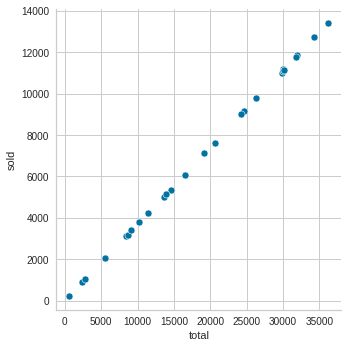

In [ ]:
sns.relplot(x='total', y='sold', data=category)
plt.show()

> - **Scatter plot** di atas menunjukkan bahwa **jumlah stok produk yang terjual akan semakin banyak seiring dengan meningkatnya jumlah stok produk keseluruhan**
- Mungkin kita dapat melihat durasi waktu produk terjual dengan menambahkan kolom `avg_dur_stock_sold`, yaitu selisih antara waktu produk terjual dengan waktu produk masuk ke retail (`sold_at` - `created_at`).

In [ ]:
#menambah kolom avg_dur_stock_sold setelah kolom sold_at untuk melihat selisih waktu produk terjual dengan produk masuk
inven_dist.insert(4, column="avg_dur_stock_sold", value=inven_dist['sold_at'] - inven_dist['created_at'])

In [ ]:
#menampilkan data selisih waktu produk terjual dengan produk masuk untuk setiap kategori produk
inven_dist.groupby(['product_category']).avg_dur_stock_sold.mean().sort_values(ascending=False).to_frame()

,avg_dur_stock_sold
product_category,
Sleep & Lounge,30 days 11:05:26.334647080
Fashion Hoodies & Sweatshirts,30 days 06:42:25.037137069
Underwear,30 days 06:05:25.941477496
Sweaters,30 days 05:57:59.242560865
Pants,30 days 05:00:15.164279696
Swim,30 days 04:51:29.125952487
Blazers & Jackets,30 days 03:07:05.088000
Dresses,30 days 02:54:43.951537744
Intimates,30 days 02:40:35.807534502


> - Meskipun kategori **Clothing Sets** memiliki jumlah produk terjual paling sedikit namun kategori tersebut memiliki rata-rata durasi waktu produk terjual yang lebih cepat daripada kategori lainnya.
- Sedangkan kategori yang memiliki durasi waktu produk terjual paling lama adalah **Sleep & Lounge**.
- Melihat durasi waktu produk terjual ini dapat mengindikasikan tingkat permintaan dari customer terhadap suatu produk.
- Kita ingin melihat persentase perbandingan antara jumlah stok produk yang terjual dengan jumlah stok produk keseluruhan dan menambahkannya sebagai kolom `stock_sell_rate` untuk setiap kategori.
- `stock_sell_rate` = (stock sold (`sold`)/ total stock (`total`)) x 100%

In [ ]:
#Membuat kolom baru berupa stock_sell_rate yang menunjukkan persentase perbandingan jumlah stok produk yang terjual dengan jumlah stok produk keseluruhan
category.insert(4, column="stock_sell_rate", value=(category['sold']/category['total'])*100)
category.sort_values(by='stock_sell_rate', ascending=True)

,product_category,sold,quantity,total,stock_sell_rate
3,Clothing Sets,220,391,611,36.006547
18,Socks,6069,10434,16503,36.775132
8,Jumpsuits & Rompers,885,1519,2404,36.813644
9,Leggings,3174,5446,8620,36.821346
4,Dresses,5365,9205,14570,36.822237
10,Maternity,5013,8577,13590,36.887417
15,Shorts,11014,18824,29838,36.912662
23,Swim,11155,19031,30186,36.954217
6,Intimates,13405,22839,36244,36.985432
24,Tops & Tees,11751,20017,31768,36.990053


> - Kategori **Suits** memiliki `stock_sell_rate` yang paling tinggi sedangkan kategori **Clothing Sets** memiliki `stock_sell_rate` yang paling rendah.
> - Namun semua kategori memiliki `stock_sell_rate` dengan rentang 36-37% maka dapat dikatakan bahwa jumlah stok produk yang terjual tidak mencapai setengah jumlah stok produk keseluruhan untuk setiap kategori 

> - Sebelumnya kita perlu melihat kinerja perusahaan dari sisi keseluruhan produk seperti melihat berapa persentase antara produk yang terjual dengan produk yang tersedia

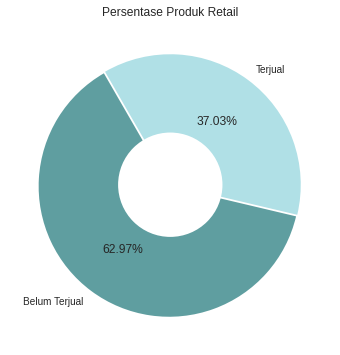

In [ ]:
#membuat dataframe untuk jumlah produk terjual dan belum terjual
product_status = pd.DataFrame(inven_dist['sold'].value_counts().reset_index())
product_status.rename(columns = {'index':'Status','sold':'Number of Products'}, inplace=True)
product_status.replace({0:'Belum Terjual', 1:'Terjual'}, inplace=True)

#visualisasi persentase produk yang belum terjual maupun sudah terjual
plt.figure(figsize=(7,6))
plt.pie(product_status['Number of Products'], explode=(0.015,0),
        labels=product_status['Status'],
        colors=['cadetblue','powderblue'], autopct='%1.2f%%', 
        startangle=120)

centre_circle = plt.Circle((0,0),0.40,fc='white') #membuat pie plot berwarna putih agar menjadi donut pie chart
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Persentase Produk Retail")
plt.show()

> Jumlah stok product sebanyak **486985** dengan rincian
- Stok product terjual      : **180353** (**37.03%**)
- Stok product belum terjual: **306632** (**62.97%**)

> Hal ini menunjukkan bahwa memang masih banyak produk yang belum terjual atau lebih dari 50% dari total keseluruhan produk.

In [ ]:
#Membuat dataframe jumlah produk yang belum terjual di setiap tahun
product_count = inven_dist.set_index('created_at')['id'].resample('Y').nunique().to_frame("count_product")
product_count

,count_product
created_at,
2018-12-31,49
2019-12-31,9682
2020-12-31,159609
2021-12-31,203507
2022-12-31,114138


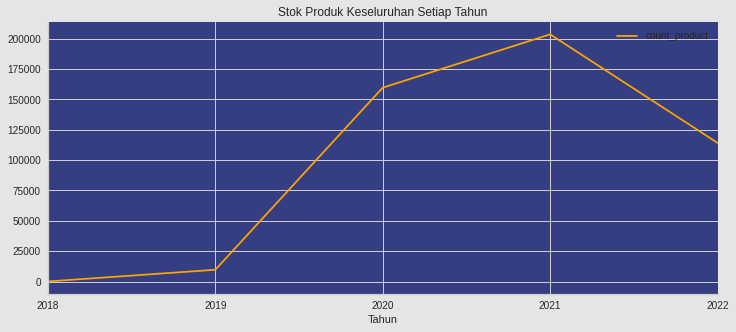

In [ ]:
#Visualisasi jumlah produk belum terjual untuk setiap tahun
fig, ax = plt.subplots(figsize = (12, 5), facecolor = "#e5e5e5")
ax.set_facecolor("#353E82")

product_count.plot(ax = ax, color="orange").set_title("Stok Produk Keseluruhan Setiap Tahun")

plt.xlabel("Tahun")
sns.despine()
plt.show()

> - Jumlah stok produk yang dijual oleh perusahaan ini mengalami peningkatan setiap tahunnya

In [ ]:
#Membuat dataframe jumlah produk yang terjual di setiap tahun
product_count_sold = sold.set_index('sold_at')['id'].resample('Y').nunique().to_frame("count_product")
product_count_sold

,count_product
sold_at,
2019-12-31,8164
2020-12-31,30248
2021-12-31,70817
2022-12-31,71124


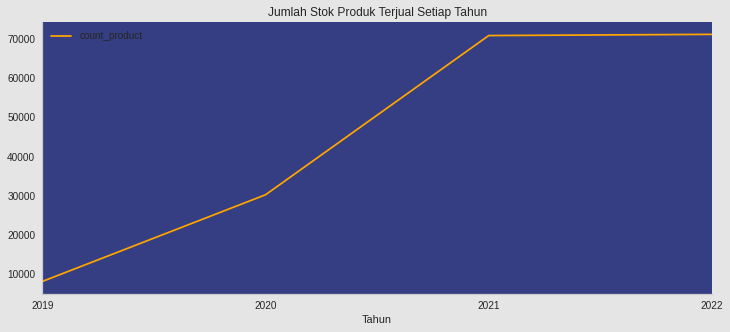

In [ ]:
#Visualisasi jumlah produk terjual untuk setiap tahun
fig, ax = plt.subplots(figsize = (12, 5), facecolor = "#e5e5e5")
ax.set_facecolor("#353E82")

product_count_sold.plot(ax = ax, color="orange").set_title("Jumlah Stok Produk Terjual Setiap Tahun")

plt.xlabel("Tahun")
sns.despine()
plt.grid()
plt.show()

> - Jumlah stok produk yang terjual juga mengalami peningkatan setiap tahunnya.

> - Dari EDA yang telah dilakukan maka akan dilakukan analisis untuk dapat merekomendasikan kepada perusahaan terkait kategori mana yang populer dan tidak populer berdasarkan `stock_sell_rate` dan `avg_dur_stock_sold`nya 

> Rekomendasi yang dapat diberikan: 
- Kategori *popular* dapat ditampilkan di halaman depan app untuk mempertahankan dan meningkatkan penjualan stok produknya.
- Kategori *unpopular* dapat diberikan promosi/diskon kepada customer ataupun menarik brand lain yang belum tersedia di kategori tersebut dan tentunya digemari oleh customer.

## **Data Preparation**

Analisis yang akan dilakukan menggunakan K-Means Clustering untuk mengelompokkan kategori yang *popular* dan *unpopular* sepanjang tahun 2020-2022

Note: dipilih tahun 2020-2022 karena stok produk yang masuk pada tahun 2018-2019 sudah habis terjual

In [ ]:
inven_dist.insert(4, column ="year", value=inven_dist['created_at'].dt.year)

In [ ]:
inven_dist_2020 = inven_dist[inven_dist['year']>=2020]

### **Handling Missing Values**



In [ ]:
inven_dist_2020.isnull().sum() #melihat jumlah missing value setiap kolom

id                                     0
product_id                             0
created_at                             0
sold_at                           306632
year                                   0
avg_dur_stock_sold                306632
sold                                   0
quantity                               0
cost                                   0
product_category                       0
product_name                           0
product_brand                          0
product_retail_price                   0
product_department                     0
product_sku                            0
product_distribution_center_id         0
distribution_centers_name              0
latitude                               0
longitude                              0
dtype: int64

> - ***Missing value*** pada `sold_at` dan `avg_dur_stock_sold` tidak ditangani karena menunjukkan produk belum terjual

### **Data Cleaning**

**Removing irrelevant observations**

> Karena ingin memfokuskan analisis **K-Means Clustering** pada kategori produk maka dilakukan `group by` pada `product_category` dan melakukan agregrasi terhadap kolom yang dibutuhkan untuk modeling

In [ ]:
category = inven_dist_2020.groupby("product_category") #group by product_category
category = category.agg({"sold": "sum", "quantity": "sum",
                   "cost": "mean", "product_retail_price": "mean", 
                   'avg_dur_stock_sold':'mean'}).reset_index() #agregrasi kolom
category.insert(3, column="total", value=category['sold']+category['quantity']) #menambah kolom total
category.insert(4, column="stock_sell_rate", value=(category['sold']/category['total'])*100) #menambah kolom sell_rate
category

,product_category,sold,quantity,total,stock_sell_rate,cost,product_retail_price,avg_dur_stock_sold
0,Accessories,9250,16547,25797,35.856883,16.930290,42.197587,30 days 01:26:24
1,Active,8630,15481,24111,35.792792,20.565923,48.919358,29 days 15:49:15.921205098
2,Blazers & Jackets,2967,5285,8252,35.954920,35.019794,92.468685,29 days 22:46:42.831142568
3,Clothing Sets,214,391,605,35.371901,53.019125,85.991752,28 days 14:28:02.242990654
4,Dresses,5048,9205,14253,35.417105,38.142252,84.594524,29 days 23:44:01.521394611
5,Fashion Hoodies & Sweatshirts,11203,20065,31268,35.828963,28.567289,54.924059,30 days 01:43:59.185932339
6,Intimates,12694,22839,35533,35.724538,17.855804,33.605985,29 days 22:51:01.729951158
7,Jeans,12030,21583,33613,35.789724,52.566514,98.190318,29 days 22:59:11.521197007
8,Jumpsuits & Rompers,847,1519,2366,35.798817,24.835779,46.804611,29 days 15:40:09.917355372
9,Leggings,3003,5446,8449,35.542668,16.107402,26.833544,29 days 13:27:01.978021978


> Kolom `avg_dur_stock_sold` akan dirubah tipe datanya menjadi `int64` maka di perlu diekstrak terlebih dahulu menjadi *minutes*.

In [ ]:
#Mengubah tipe data avg_dur_stock_sold menjadi int dan mengekstraknya menjadi minutes
category['avg_dur_stock_sold'] = round(((category['avg_dur_stock_sold'].dt.days)*60) + 
                              (category['avg_dur_stock_sold'].dt.components['hours']) + 
                              ((category['avg_dur_stock_sold'].dt.components['minutes'])/60)).astype(int)
category.head(3)

,product_category,sold,quantity,total,stock_sell_rate,cost,product_retail_price,avg_dur_stock_sold
0,Accessories,9250,16547,25797,35.856883,16.930290,42.197587,1801
1,Active,8630,15481,24111,35.792792,20.565923,48.919358,1756
2,Blazers & Jackets,2967,5285,8252,35.954920,35.019794,92.468685,1763


**Removing unnecessary columns**

> - Kemudian dihilangkan kolom yang tidak dibutuhkan untuk modelling
> - Untuk modelling hanya dibutuhkan kolom `stock_sell_rate` dan `avg_dur_stock_sold`

In [ ]:
#menghapus kolom yang tidak dibutuhkan
category_preprocessed=category.drop(['quantity','sold', 'total','product_retail_price','product_category','cost'], axis = 1)
category_preprocessed

,stock_sell_rate,avg_dur_stock_sold
0,35.856883,1801
1,35.792792,1756
2,35.954920,1763
3,35.371901,1694
4,35.417105,1764
5,35.828963,1802
6,35.724538,1763
7,35.789724,1763
8,35.798817,1756
9,35.542668,1753


### **Handling (drop) outliers**

> Karena **K-Means Clustering** cukup sensitif terhadap **outlier** maka perlu dilakukan pengecekan apakah terdapat **outlier** pada kolom `stock_sell_rate` dan `avg_dur_stock_sold`

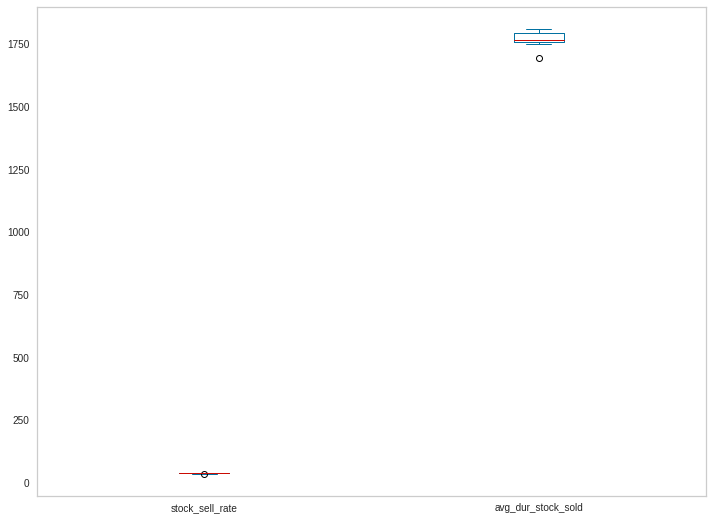

In [ ]:
category_preprocessed.plot(kind="box", figsize=(12, 9)) #menampilkan box plot
plt.grid(False) #tidak menampilkan grid
plt.show()

> Terdapat outlier pada `sell_rate` dan `time_diff` dan perlu untuk ditangani menggunakan IQR

In [ ]:
IQR= category_preprocessed['avg_dur_stock_sold'].quantile(0.75)-category_preprocessed['avg_dur_stock_sold'].quantile(0.25)
lower_limit= category_preprocessed['avg_dur_stock_sold'].quantile(0.25) - 1.5*IQR
upper_limit=category_preprocessed['avg_dur_stock_sold'].quantile(0.75) + 1.5*IQR

u=category_preprocessed[category_preprocessed['avg_dur_stock_sold']>upper_limit]
l=category_preprocessed[category_preprocessed['avg_dur_stock_sold']<lower_limit]

category_preprocessed_iqr=category_preprocessed[(category_preprocessed['avg_dur_stock_sold']<upper_limit) & 
                             (category_preprocessed['avg_dur_stock_sold']>lower_limit)]
print('Nilai outlier dari batas atas avg_dur_stock_sold:',upper_limit)
print('Nilai outlier dari batas bawah avg_dur_stock_sold:',lower_limit)                 
print('Ukuran data sebelum outlier avg_dur_stock_sold dihapus',category_preprocessed.shape)
print('Ukuran data setelah outlier avg_dur_stock_sold dihapus',category_preprocessed_iqr.shape)
print('Jumlah outlier pada avg_dur_stock_sold:',len(u)+len(l))

Nilai outlier dari batas atas avg_dur_stock_sold: 1845.0
Nilai outlier dari batas bawah avg_dur_stock_sold: 1703.0
Ukuran data sebelum outlier avg_dur_stock_sold dihapus (26, 2)
Ukuran data setelah outlier avg_dur_stock_sold dihapus (25, 2)
Jumlah outlier pada avg_dur_stock_sold: 1


> - Terlihat perubahan ukuran data dari 26 baris menjadi 25 baris sehingga terdapat 1 baris yang menjadi outliers pada `avg_dur_stock_sold`
> - Outlier pada `avg_dur_stock_sold` sudah berhasil ditangani dan selanjutnya menangani outlier pada `stock_sell_rate`

In [ ]:
IQR_s= category_preprocessed_iqr['stock_sell_rate'].quantile(0.75)-category_preprocessed_iqr['stock_sell_rate'].quantile(0.25)
lower_limit_s= category_preprocessed_iqr['stock_sell_rate'].quantile(0.25) - 1.5*IQR_s
upper_limit_s=category_preprocessed_iqr['stock_sell_rate'].quantile(0.75) + 1.5*IQR_s

u_s=category_preprocessed_iqr[category_preprocessed_iqr['stock_sell_rate']>upper_limit_s]
l_s=category_preprocessed_iqr[category_preprocessed_iqr['stock_sell_rate']<lower_limit_s]

category_preprocessed_iqr2=category_preprocessed_iqr[(category_preprocessed_iqr['stock_sell_rate']<upper_limit_s) & 
                             (category_preprocessed_iqr['stock_sell_rate']>lower_limit_s)]
print('Batas atas stock_sell_rate:',upper_limit_s)
print('Batas bawah stock_sell_rate:',lower_limit_s)                 
print('Ukuran data sebelum outlier stock_sell_rate dihapus',category_preprocessed_iqr.shape)
print('Ukuran data setelah outlier stock_sell_rate dihapus',category_preprocessed_iqr2.shape)
print('Jumlah outlier pada stock_sell_rate:',len(u_s)+len(l_s))

Batas atas stock_sell_rate: 36.06740025117186
Batas bawah stock_sell_rate: 35.45212256016676
Ukuran data sebelum outlier stock_sell_rate dihapus (25, 2)
Ukuran data setelah outlier stock_sell_rate dihapus (24, 2)
Jumlah outlier pada stock_sell_rate: 1


> Outlier pada `stock_sell_rate` sudah berhasil ditangani

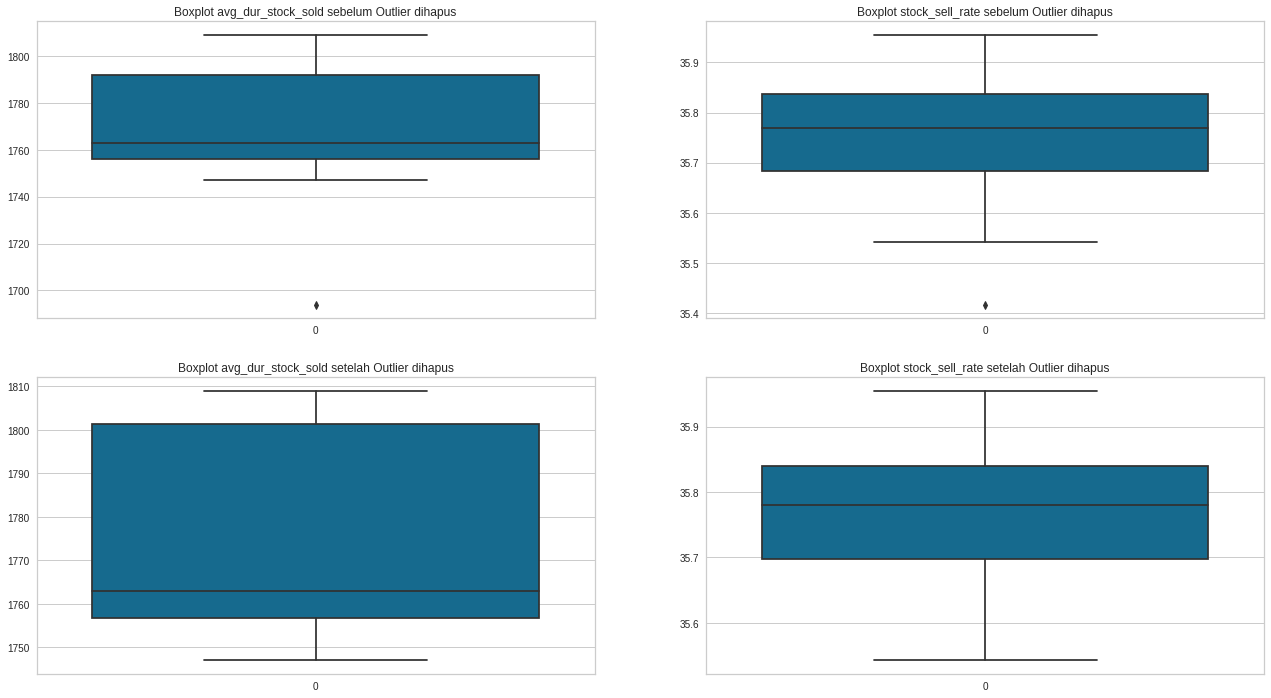

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(22,12))

sns.boxplot(data=category_preprocessed['avg_dur_stock_sold'], ax=ax[0,0])
ax[0,0].set_title('Boxplot avg_dur_stock_sold sebelum Outlier dihapus')

sns.boxplot(data=category_preprocessed_iqr['stock_sell_rate'], ax=ax[0,1])
ax[0,1].set_title('Boxplot stock_sell_rate sebelum Outlier dihapus')

sns.boxplot(data=category_preprocessed_iqr2['avg_dur_stock_sold'], ax=ax[1,0])
ax[1,0].set_title('Boxplot avg_dur_stock_sold setelah Outlier dihapus')

sns.boxplot(data=category_preprocessed_iqr2['stock_sell_rate'], ax=ax[1,1])
ax[1,1].set_title('Boxplot stock_sell_rate setelah Outlier dihapus')

plt.show()

> Sudah tidak terdapat outlier pada data yang akan digunakan untuk modelling

### **Data Scaling**

Sebelum masuk ke modelling akan dilakukan standarisasi semua fitur numerik yang sudah terbentuk menggunakan `StandardScaler`

In [ ]:
scaler = StandardScaler() #standarisasi fitur numerik dengan fungsi standardscaler
scaler.fit(category_preprocessed_iqr2)
X_scaled = pd.DataFrame(scaler.transform(category_preprocessed_iqr2),columns=category_preprocessed_iqr2.columns)

X_scaled.head()

,stock_sell_rate,avg_dur_stock_sold
0,0.920344,1.370770
1,0.312483,-0.747158
2,1.850166,-0.417702
3,0.655540,1.417835
4,-0.334862,-0.417702


# **Checkpoint 4**

## **Modeling**

> - Modelling yang dilakukan menggunakan K-Means Clustering. 
- Pemilihan model didasarkan dari tujuan analisis  dan literatur berjudul [Analysis of Data Mining Using K-Means Clustering Algorithm for Product Grouping](https://ijiis.org/index.php/IJIIS/article/view/3/2) oleh Mohammad Imrona, Uswatun Hasanaha, dan Bahrul Humaidia pada tahun 2020. 
- Penelitian tersebut menggunakan K-Means Clustering untuk mengelompokkan produk di Toko Rizki Barokah berdasarkan produk yang diminati dan kurang diminati. Data yang digunakan berupa data jumlah sisa stok barang dan data penjualan produk sepanjang November 2018 hingga Januari 2019. Atribut atau variabel yang digunakan pada penelitian adalah nama barang, jumlah stok yang terjual, dan stok yang tersedia. Penelitian dilakukan terhadap 10 sampel data dan hasilnya pengelompokan produk terdiri dari 2 cluster yaitu cluster 1 yang merupakan produk kurang diminati sebanyak 4 produk dan cluster 2 merupakan produk paling diminati sebanyak 6 produk.

### **K-Means**

> Tahap awal adalah menentukan nilai `k` centroid dimana `k` sama dengan jumlah cluster yang dipilih dan centroid adalah titik data yang mewakili pusat cluster.

In [ ]:
K = 4
kmeans_4 = KMeans(n_clusters=K)

kmeans_4.fit(X_scaled)

KMeans(n_clusters=4)

> Nilai `k` yang digunakan adalah 4 maka dipilihlah 4 cluster dalam modelling ini

> Hasil clustering dimasukkan dalam dataframe `X_scaled` atau dataframe hasil standarisasi

In [ ]:
X = X_scaled.assign(
    clusters_of_4=kmeans_4.predict(X_scaled),
)

with pd.option_context("display.max_columns", None):
    display(X.sort_values('clusters_of_4', ascending=False))

,stock_sell_rate,avg_dur_stock_sold,clusters_of_4
23,-0.301281,1.606095,3
21,-0.551116,1.511965,3
20,-0.217397,1.464900,3
13,-0.969317,-0.417702,2
19,-0.730227,-0.417702,2
16,-1.171775,-0.558898,2
7,-2.059782,-0.888353,2
8,-1.622575,-1.029548,2
14,-1.790244,-0.605963,2
15,0.977540,1.747291,1


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


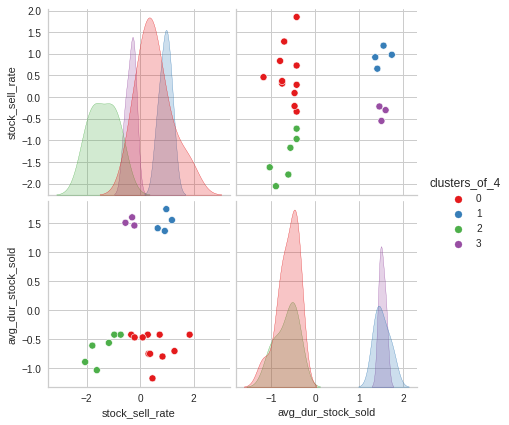

In [ ]:
sns.pairplot(data=X, hue="clusters_of_4", size=3, palette="Set1") #melihat distribusi data
plt.show()

> Distribusi data untuk setiap cluster cukup normal.

> Kemudian akan divisualisasikan cluster dan centroidnya dengan scatter plot

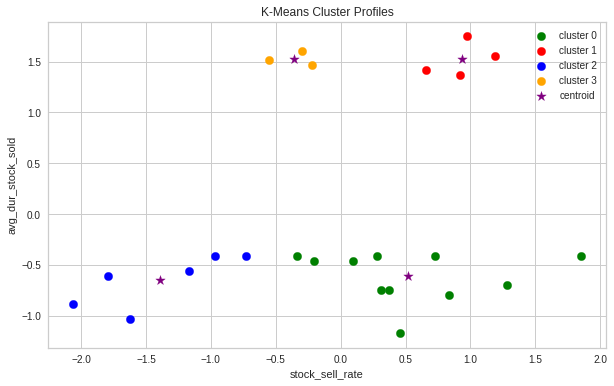

In [ ]:
# Visualisasi cluster dengan data standarisasi
df1 = X[X.clusters_of_4==0]
df2 = X[X.clusters_of_4==1]
df3 = X[X.clusters_of_4==2]
df4 = X[X.clusters_of_4==3]

plt.figure(figsize=(10,6))

plt.scatter(df1.stock_sell_rate,df1['avg_dur_stock_sold'], 
            color='green', s=70, label='cluster 0')
plt.scatter(df2.stock_sell_rate,df2['avg_dur_stock_sold'], 
            color='red', s=70, label='cluster 1')
plt.scatter(df3.stock_sell_rate,df3['avg_dur_stock_sold'], 
            color='blue', s=70, label='cluster 2')
plt.scatter(df4.stock_sell_rate,df4['avg_dur_stock_sold'], 
            color='orange', s=70, label='cluster 3')

plt.scatter(kmeans_4.cluster_centers_[:,0], 
            kmeans_4.cluster_centers_[:,1],
            color='purple',s=100, 
            marker='*',label='centroid')
plt.legend()
plt.xlabel('stock_sell_rate')
plt.ylabel('avg_dur_stock_sold')
plt.title('K-Means Cluster Profiles')
plt.show()

> Gambar di atas merupakan visualisasi hasil clustering dengan sumbu x merupakan `stock_sell_rate` dan sumbu y merupakan `avg_dur_stock_sold`.

> Interpretasi:
- Cluster 0 : produk dengan tingkat terjualnya stok produk yang tinggi dan rata-rata durasi waktu produk terjualnya cepat. (**Popular**)
- Cluster 1 : produk dengan tingkat terjualnya stok produk yang tinggi dan rata-rata durasi waktu produk terjualnya lama. (**Middle Popular 1**)
- Cluster 2 : produk dengan tingkat terjualnya stok produk yang rendah dan rata-rata durasi waktu produk terjualnya cepat. (**Middle Popular 2**)
- Cluster 3 : produk dengan tingkat terjualnya stok produk yang rendah dan rata-rata durasi waktu produk terjualnya lama. (**Unpopular**)

> Selanjutnya hasil clustering *merge* dengan dataframe hasil group by category

In [ ]:
#Menambahkan hasil clustering ke dataframe kategori yang belum dilakukan standarisasi
X = category_preprocessed_iqr2.assign(
    clusters_of_4=kmeans_4.predict(X_scaled),
)

with pd.option_context("display.max_columns", None):
    display(X)

,stock_sell_rate,avg_dur_stock_sold,clusters_of_4
0,35.856883,1801,1
1,35.792792,1756,0
2,35.954920,1763,0
5,35.828963,1802,1
6,35.724538,1763,0
7,35.789724,1763,0
8,35.798817,1756,0
9,35.542668,1753,2
10,35.588765,1750,2
11,35.769619,1762,0


In [ ]:
#merge dengan dataframe hasil group by category
category_cluster = pd.merge(category, X, how='left', left_on=['stock_sell_rate', 'avg_dur_stock_sold'], 
                            right_on = ['stock_sell_rate', 'avg_dur_stock_sold'])
category_cluster.sort_values('clusters_of_4', ascending=False)

,product_category,sold,quantity,total,stock_sell_rate,cost,product_retail_price,avg_dur_stock_sold,clusters_of_4
25,Underwear,7216,12981,20197,35.728078,12.909096,27.430829,1806,3.0
23,Swim,10567,19031,29598,35.701737,29.044580,57.230921,1804,3.0
22,Sweaters,10487,18858,29345,35.736923,36.840200,76.399765,1803,3.0
15,Shorts,10432,18824,29256,35.657643,23.167725,46.240220,1763,2.0
21,Suits & Sport Coats,4865,8769,13634,35.682852,52.639907,131.085024,1763,2.0
18,Socks,5777,10434,16211,35.636296,12.147627,20.175113,1760,2.0
9,Leggings,3003,5446,8449,35.542668,16.107402,26.833544,1753,2.0
10,Maternity,4739,8577,13316,35.588765,22.335216,50.541203,1750,2.0
16,Skirts,1934,3503,5437,35.571087,20.701627,52.113491,1759,2.0
17,Sleep & Lounge,10548,18864,29412,35.862913,24.012212,50.017181,1809,1.0


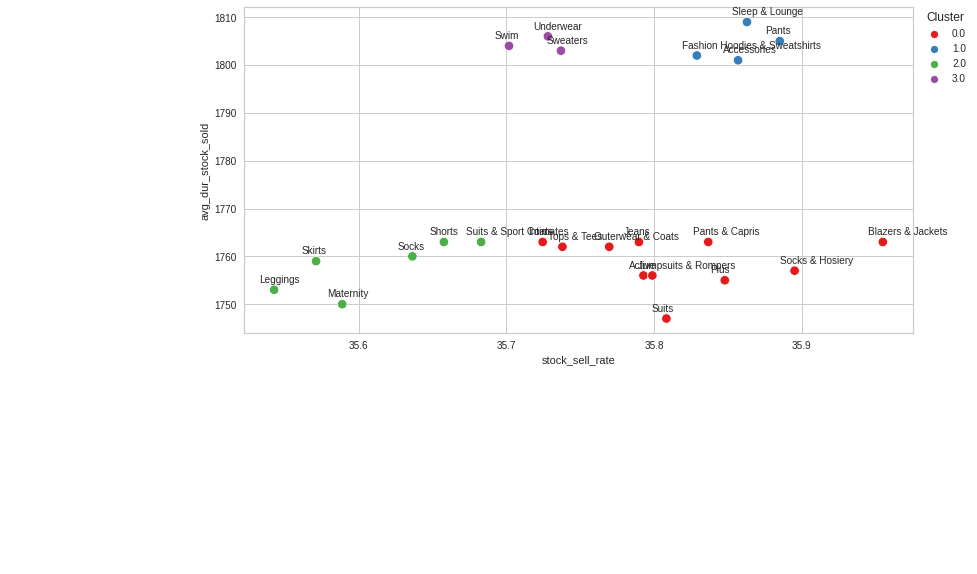

In [ ]:
#Visualisasi scatter plot dari dataframe group by category dengan hasil cluster
plt.figure(figsize=(12, 6))
sns.scatterplot(x='stock_sell_rate', y='avg_dur_stock_sold', data=category_cluster, s=90,
                hue='clusters_of_4', palette='Set1')
plt.legend(title='Cluster', bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
#dataframe for x, y
x = category_cluster['stock_sell_rate']
y = category_cluster['avg_dur_stock_sold']
n = category_cluster['product_category']
for i, txt in enumerate(n):
    plt.annotate(txt, (x[i]-0.01, y[i]+1.5), fontsize=10, rotation=0)

plt.show()

> Setelah dilakukan *merge* data maka divisualisasikan distribusi kategori produk untuk setiap cluster:
- Cluster 0 (**Popular**): Tops & Tees, Suits, Socks & Hosiery, Plus, Pants & Capris, Outerwear & Coats, Jumpsuits & Rompers, Jeans, Intimates, Blazers & Jackets, dan Active
- Cluster 1 (**Middle Populer 1**): Sleep & Lounge, Pants, Fashion Hoodies & Sweatshirts, dan Accessories
- Cluster 2 (**Middle Populer 2**): Maternity, Socks, Leggings, Skirts, Suits & Sport Coats, dan Shorts
- Cluster 3 (**Unpopular**): Underwear, Swim, dan Sweaters

> Untuk kategory **Dresses** & **Clothing Sets** karena awalnya merupakan ***outlier*** maka akan di plot terlebih dahulu dan dilihat mana kategori terdekatnya

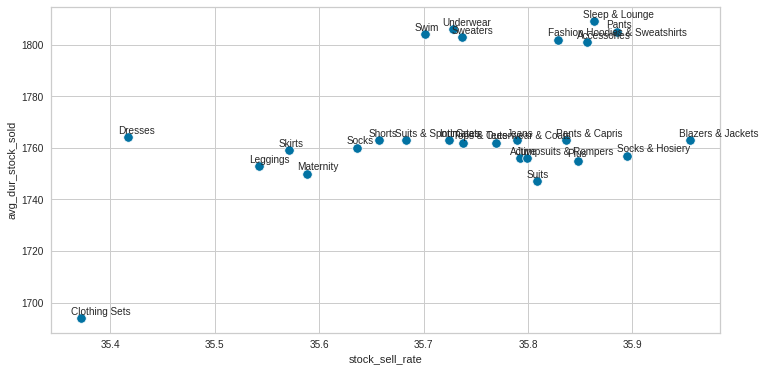

In [ ]:
##Visualisasi scatter plot dari dataframe group by category tanpa hasil cluster
plt.figure(figsize=(12, 6))
sns.scatterplot(x='stock_sell_rate', y='avg_dur_stock_sold', s=90, data=category_cluster, palette='Set1')
#dataframe for x, y
x = category_cluster['stock_sell_rate']
y = category_cluster['avg_dur_stock_sold']
n = category_cluster['product_category']
for i, txt in enumerate(n):
    plt.annotate(txt, (x[i]-0.01, y[i]+1.5), fontsize=10, rotation=0)

plt.show()

> Kategori **Dresses** dan **Clothing Sets** berada di dekat kategori **Legging** pada plot `stock_sell_rate` vs `avg_dur_stock_sold` maka akan dimasukkan pada **Cluster** yang sama dengan kategori **Legging**, yaitu **Cluster 2**

In [ ]:
category_cluster = category_cluster.fillna(value = 2.0)
category_cluster['clusters_of_4'] = category_cluster['clusters_of_4'].astype(int)
category_cluster.iloc[3:5]

,product_category,sold,quantity,total,stock_sell_rate,cost,product_retail_price,avg_dur_stock_sold,clusters_of_4
3,Clothing Sets,214,391,605,35.371901,53.019125,85.991752,1694,2
4,Dresses,5048,9205,14253,35.417105,38.142252,84.594524,1764,2


> Rekomendasi akhir untuk The Look:
- Kategori ***popular*** dapat ditampilkan di halaman depan app untuk mempertahankan dan meningkatkan penjualan stok produknya.
- Kategori ***middle popular 1 & 2*** dapat ditingkatkan pemasarannya kepada customer.
- Kategori ***unpopular*** dapat diberikan promosi/diskon kepada customer agar stok produk yang tersisa dapat terjual dengan cepat.


## **Model Evaluation**

### **Cluster Cardinality**

> **Cluster cardinality** adalah jumlah sampel setiap cluster.

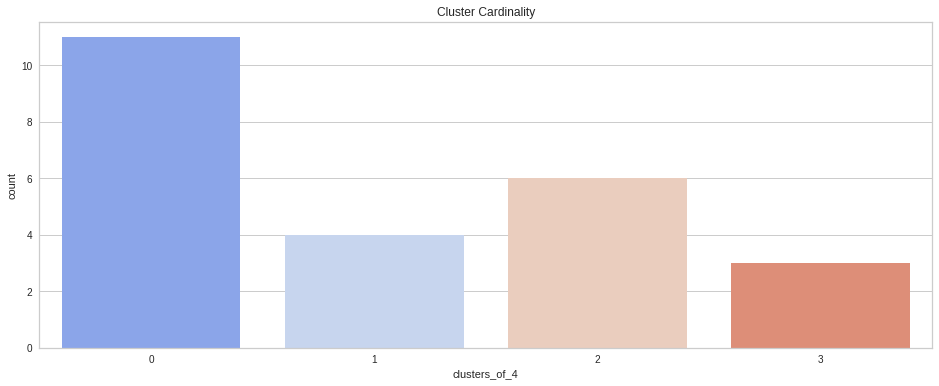

In [ ]:
fig, axis = plt.subplots(figsize=(16, 6))
sns.countplot(x="clusters_of_4", data=X, palette="coolwarm")
plt.title('Cluster Cardinality')
plt.show()

> Model dengan 4 cluster (k=4), menunjukkan bahwa terdapat perbedaan kardinalitas cukup jauh antara cluster 0 dengan cluster 1, 2, dan 3 sehingga jumlah sampel untuk cluster 0 lebih banyak daripada cluster 1, 2, dan 3.

### **Cluster Magnitude**

> **Cluster magnitude** adalah jumlah jarak dari semua sampel data ke pusat cluster (centroid). 

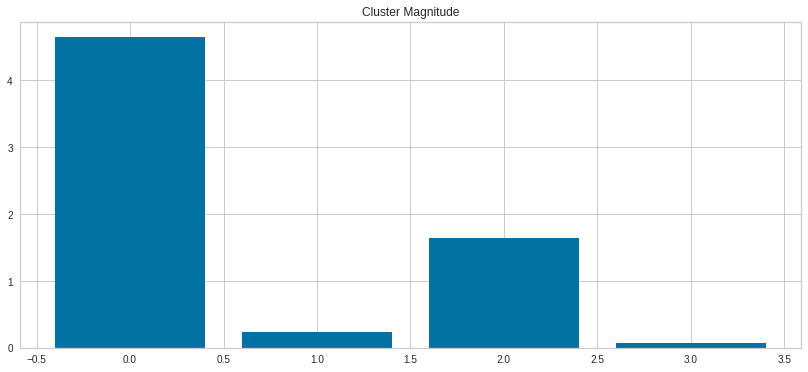

In [ ]:
fig, axis = plt.subplots(figsize=(14, 6))

distances = kmeans_4.transform(X_scaled)
preds = kmeans_4.predict(X_scaled)
inertia_per_cluster = np.array([sum(dist[c]**2 for dist, c in zip(distances, preds) if c == cluster)
        for cluster in range(kmeans_4.n_clusters)])
plt.bar(x=range(kmeans_4.n_clusters), height=inertia_per_cluster)
plt.title("Cluster Magnitude")
plt.show()

> Model dengan 4 cluster (k=4), menunjukkan bahwa terdapat perbedaan magnitude cukup jauh antara cluster 0 dengan cluster 1, 2, dan 3 sehingga jumlah jarak dari semua sampel data ke centroid pada cluster 0 lebih besar daripada cluster 1, 2, dan 3.

### **Elbow Method**

> - Menemukan jumlah cluster yang optimal merupakan bagian penting dari algoritma ini dan metode yang umum digunakan untuk mencari nilai `K` optimal adalah **Metode Elbow**.
- Untuk menggunakan Elbow Method perlu dihitung dihitung nilai rata-rata jarak kuadrat dari pusat cluster dari masing-masing cluster (**distorsi**) atau jumlah kuadrat jarak sampel ke pusat cluster terdekat (**inertia**). Nilai distorsi/inersia tersebut kemudian divisualisasikan bersama dengan jumlah cluster `K` dalam satu grafik. Dari grafik akan dianalisis jumlah cluster yang optimal ditandai dengan bentuk siku elbow pada plot setelah inertia/distorsi mulai menurun secara linier.
- Dalam **Metode Elbow**, nilai `K` divariasikan secara bebas dan disini digunakan nilai `K` dari 1 – 10

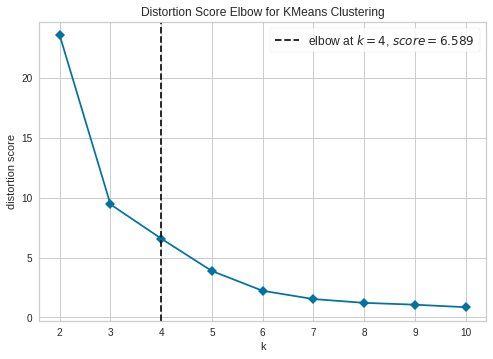

In [ ]:
model = KMeans() #inisiasi model KMeans
visualizer = KElbowVisualizer(model, k=(2,11), 
                              timings= False) # K divariasikan rentang jumlah clusters.
visualizer.fit(X_scaled)        # menyesuaikan data ke visualizer
visualizer.show()
plt.show()

> Grafik **Metode Elbow** menunjukkan nilai `K` yang optimal untuk modeling ini adalah 4

### **Silhouette Coefficient**

* **Koefisien silhouette** dihitung menggunakan persamaan:

$$
\frac{b-a}{\max{(a, b)}},
$$

* $a$ adalah jarak **intra-cluster**, yaitu jarak antar elemen dalam satu cluster, dan $b$ adalah jarak **inter-cluster**, yaitu jarak suatu elemen dengan elemen lain yang tidak dalam satu cluster yang sama. 

* Nilai **koefisien silhouette** berada pada rentang antara -1 sampai 1. Jika **koefisien silhouette** semakin **mendekati 1**, maka bisa dikatakan cluster yang dihasilkan **sudah optimal**.

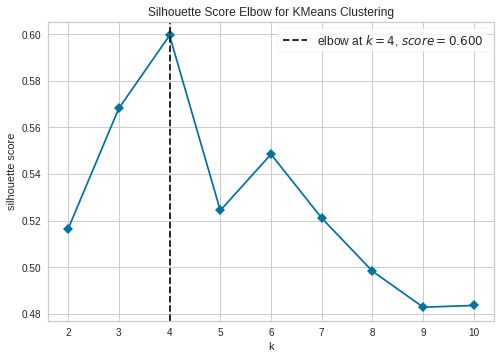

In [ ]:
# Silhouette Score for K means
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,11), 
                              metric='silhouette', timings= False) # K divariasikan rentang jumlah clusters
visualizer.fit(X_scaled)        #menyesuaikan data ke visualizer
visualizer.show()
plt.show()

> Grafik ***Silhouette Score*** menunjukkan nilai `K` yang optimal adalah 4 dengan nilai ***silhouette score*** sebesar 0.6 dimana cukup mendekati 1

# **Export File**

> Hasil K-Means Clustering di export .csv untuk divisualisasikan di Tableau

In [ ]:
category_cluster['avg_dur_stock_sold'] = (category['avg_dur_stock_sold']/60)
category_cluster.head(1)

,product_category,sold,quantity,total,stock_sell_rate,cost,product_retail_price,avg_dur_stock_sold,clusters_of_4
0,Accessories,9250,16547,25797,35.856883,16.93029,42.197587,30.016667,1


In [ ]:
category_cluster.rename(columns = {'clusters_of_4':'clusters'}, inplace = True)
category_cluster['clusters'] = category_cluster['clusters'].apply(str)

In [ ]:
category_cluster.to_csv(r'/content/drive/MyDrive/module_&_data/finalproject/category_cluster.csv', index = False, header=True)

In [ ]:
inven_dist = inven_dist.drop(columns ="year")
inven_dist.insert(7, column ="total", value=inven_dist['sold'] + inven_dist['quantity'])
inven_dist['avg_dur_stock_sold'] = ((inven_dist['avg_dur_stock_sold'].dt.days) + ((inven_dist['avg_dur_stock_sold'].dt.components['hours'])/60) + ((inven_dist['avg_dur_stock_sold'].dt.components['minutes'])/360))

In [ ]:
inven_dist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 486985 entries, 0 to 487393
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              486985 non-null  int64         
 1   product_id                      486985 non-null  int64         
 2   created_at                      486985 non-null  datetime64[ns]
 3   sold_at                         180353 non-null  datetime64[ns]
 4   avg_dur_stock_sold              180353 non-null  float64       
 5   sold                            486985 non-null  int64         
 6   quantity                        486985 non-null  int64         
 7   total                           486985 non-null  int64         
 8   cost                            486985 non-null  float64       
 9   product_category                486985 non-null  object        
 10  product_name                    486985 non-null  object 

In [ ]:
inven_dist.to_csv(r'/content/drive/MyDrive/module_&_data/finalproject/inven_dist_new.csv', index = False, header=True)

In [ ]:
inven_dist_cluster = pd.merge(inven_dist, category_cluster, how='left', left_on=['product_category'], right_on = ['product_category'])
inven_dist_cluster.columns

Index(['id', 'product_id', 'created_at', 'sold_at', 'avg_dur_stock_sold_x',
       'sold_x', 'quantity_x', 'total_x', 'cost_x', 'product_category',
       'product_name', 'product_brand', 'product_retail_price_x',
       'product_department', 'product_sku', 'product_distribution_center_id',
       'distribution_centers_name', 'latitude', 'longitude', 'sold_y',
       'quantity_y', 'total_y', 'stock_sell_rate', 'cost_y',
       'product_retail_price_y', 'avg_dur_stock_sold_y', 'clusters'],
      dtype='object')

In [ ]:
inven_dist_cluster = inven_dist_cluster.drop(columns=['sold_y',
                        'quantity_y', 'total_y', 'stock_sell_rate', 'cost_y',
                        'product_retail_price_y', 'avg_dur_stock_sold_y'])
inven_dist_cluster.rename(columns = {'avg_dur_stock_sold_x':'avg_dur_stock_sold_day', 'sold_x':'product_sold', 
                                     'quantity_x':'product_quantity', 'cost_x':'product_cost', 
                                     'product_retail_price_x':'product_retail_price',
                                     'total_x':'total'}, inplace = True)
inven_dist_cluster['clusters'] = inven_dist_cluster['clusters'].apply(str)
inven_dist_cluster.columns

Index(['id', 'product_id', 'created_at', 'sold_at', 'avg_dur_stock_sold_day',
       'product_sold', 'product_quantity', 'total', 'product_cost',
       'product_category', 'product_name', 'product_brand',
       'product_retail_price', 'product_department', 'product_sku',
       'product_distribution_center_id', 'distribution_centers_name',
       'latitude', 'longitude', 'clusters'],
      dtype='object')

In [ ]:
inven_dist_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 486985 entries, 0 to 486984
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              486985 non-null  int64         
 1   product_id                      486985 non-null  int64         
 2   created_at                      486985 non-null  datetime64[ns]
 3   sold_at                         180353 non-null  datetime64[ns]
 4   avg_dur_stock_sold_day          180353 non-null  float64       
 5   product_sold                    486985 non-null  int64         
 6   product_quantity                486985 non-null  int64         
 7   total                           486985 non-null  int64         
 8   product_cost                    486985 non-null  float64       
 9   product_category                486985 non-null  object        
 10  product_name                    486985 non-null  object 

In [ ]:
inven_dist_cluster.to_csv(r'/content/drive/MyDrive/module_&_data/finalproject/inventory_distribution_cluster.csv', index = False, header=True)